
<img src='empAttrition.jpg'></img>

## Employee Attrition & Performance
**Predict Employee Attrition**

Employee attrition is a common issue that every company has to deal with. The goal of the HR analytics project is to build a model that can help the company to predict whether or not a certain employee will leave as well as identify important factors of leave. 

In this project, we try to analyse what factors lead to employee retention in companies, and what factors influence them the most. However with advances in machine learning and data science, its possible to not only predict employee attrition but to understand the key variables that influence employee attrition.


**Objective:** 
  - Constructing a model to predict whether a particular employee will leave the company. 
  - Identifying the key factors contributing to employee leaving the company. 
  - Generate key actionables to reduce employee attrition rate.
 


### Dataset
The dataset used in this analysis is provided from **IBM HR** to study about employee attrition. The dataset contain 35 variables along with Attrition variable. It can be downloaded from the <a href='https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/data'>Kaggle</a>

| Features | Description  |
| ---      | ---          |
| Education               | (1) Below College' (2) College (3) Bachelor (4) Master (5) Doctor |
| EnvironmentSatisfaction | (1) Low (2) Medium (3) High (4) Very High                         |
| JobInvolvement          | (1) Low (2) Medium (3) High (4) Very High                         |
| JobSatisfaction         | (1) Low (2) Medium (3) High (4) Very High                         |
| RelationshipSatisfaction| (1) Low (2) Medium (3) High (4) Very High                         |  
| PerformanceRating       | (1) Low (2) Good (3) Excellent (4) Outstanding                    |
| WorkLifeBalance         | (1) Bad (2) Good (3) Better (4) Best                              |



### I. Data Problem
Employee attrition is the rate at which employees leave a company. The goal of this analysis is to model employee attrition and determine the most dominant contributing factors that govern this turnover. Through this kind of analysis, we can understand how many employees are likely to leave, while also determining which employees are at the highest risk and for what reasons.

To solve this problem, I decided to use a combination of **different types of analytics**:

- **Descriptive :** What are the observations that help us shape our various hypotheses about staff attrition?
- **Diagnostic  :** Why did employees left the company?
- **Predictive  :** How many employees are about to leave?
- **Prescriptive:** How to prevent employees from leaving the company?


### II. Data Preprocessing

Each row represents an employee; each column contains employee attributes:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from biokit.viz import corrplot

#%config InlineBackend.figure_formats = {'svg', 'retina'}
%matplotlib inline

from matplotlib import rcParams
#rcParams['axes.titlepad'] = 15 
#rcParams['figure.dpi'] = 150

import warnings
warnings.filterwarnings('ignore')

#### Loading the data
We load the data and look at the different Variables in the dataset

In [2]:
data = pd.read_csv('Employee_Attrition.csv')

There are 1470 observations with 35 features.

In [3]:
data.shape

(1470, 35)

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Missing Values
It seems that there are no NA values in the dataset.

In [5]:
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### III. Exploratory Data Analysis (EDA)
In this section, we explore the dataset by taking a look at the feature distributions, how correlated one feature is to the other.

- From this overview we find that columns like **Over18**, **EmployeeCount**, **EmployeeNumber** and **StandardHours** are not informative and remove it.

In [6]:
numerical_features = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                      'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany', 
                      'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

categorical_features = ['Education','EnvironmentSatisfaction','Gender','JobInvolvement', 'JobLevel',
                        'JobSatisfaction','MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction',
                        'StockOptionLevel','WorkLifeBalance','BusinessTravel','EducationField','Department','JobRole']

### Numerical Features

In [7]:
numeric_data = pd.DataFrame(data[numerical_features])

**Correlation Matrix** uses to predict correlation between numeric varibales.

Now we will explore the relationship between variables using a correlation matrix.

In [8]:
df = numeric_data.corr()
corr = corrplot.Corrplot(df)

From the correlation plots below, we can see that quite a lot of features seem to be poorly correlated with one another. Generally when making a predictive model, it would be preferable to train a model with features that are not too correlated with one another so that we do not need to deal with **redundant features** or **multicollinearity** because some machine learning algorithms wouldn't perform well if they exist. 

- The correlation matrix displays the linear correlation between every pair of features in the form of pie of varying colors and slices to illustrate numerical proportion. 
- From the correlation plot below, we see that the predictor variables are less correlated to each other.
  - **Highly correlated features:**
    - Age variable is correlated with TotalWorkingYears
    - TotalWorkingYears correlated with MonthlyIncome
    - YearsWithCurrManager also correlated with YearsAtCompany
    - YearsWithCurrManger correlated with YearsInCurrentRole
    - YearsInCurrentRole correlated with YearsAtCompany

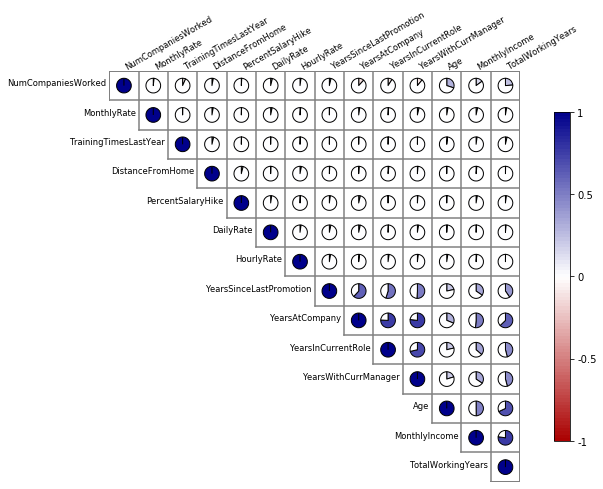

In [9]:
fig = plt.figure(figsize=(10,7))
corr.plot(shrink=0.5, upper='pie',fig=fig)

### Data Distribution of Features
One of the first few steps in exploring the data would be to have a an idea of how the features are distributed with one another.

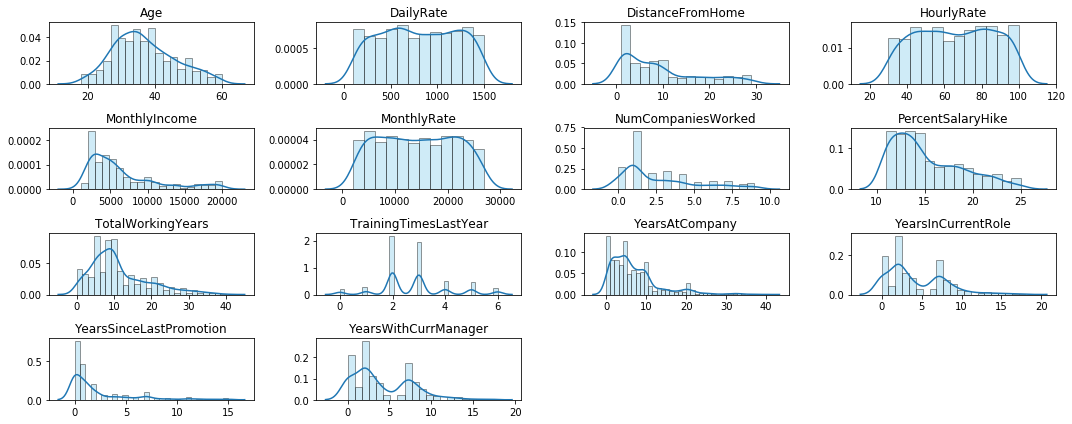

In [10]:
fig = plt.figure(figsize=(15,6))
for i, features in enumerate(numerical_features):
    ax = fig.add_subplot(4,4, i+1)
    sns.distplot(data[features],hist_kws=dict(edgecolor="k", linewidth=1,color='skyblue'))
    plt.title(features)
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [11]:
from scipy import stats
from scipy.stats import skew, kurtosis

In [12]:
skewed_features = data[numerical_features].apply(lambda x: skew(x.dropna()))
kurtosis_ = data[numerical_features].apply(lambda x: kurtosis(x.dropna()))
skewness_kurtosis = pd.DataFrame({'Skewness' :skewed_features,'Kurtosis':kurtosis_ })
skewness_kurtosis.sort_values('Skewness',ascending=False)

,Kurtosis,Skewness
YearsSinceLastPromotion,3.596318,1.982265
YearsAtCompany,3.918057,1.762728
MonthlyIncome,0.997738,1.368419
TotalWorkingYears,0.911070,1.116032
NumCompaniesWorked,0.006100,1.025423
DistanceFromHome,-0.228148,0.957140
YearsInCurrentRole,0.471720,0.916427
YearsWithCurrManager,0.166398,0.832600
PercentSalaryHike,-0.303656,0.820290
TrainingTimesLastYear,0.489232,0.552560


In [13]:
# Text Annotation
def text_annotate(cnt):
    for i in cnt.patches:
        height = i.get_height()
        cnt.text(i.get_x() + i.get_width()/2., height,'%d' % int(height),ha='center',va='bottom',
                 fontsize=10,color='black', bbox=dict(boxstyle="round,pad=0.3",facecolor='white',alpha=0.3))

### Categorical Features

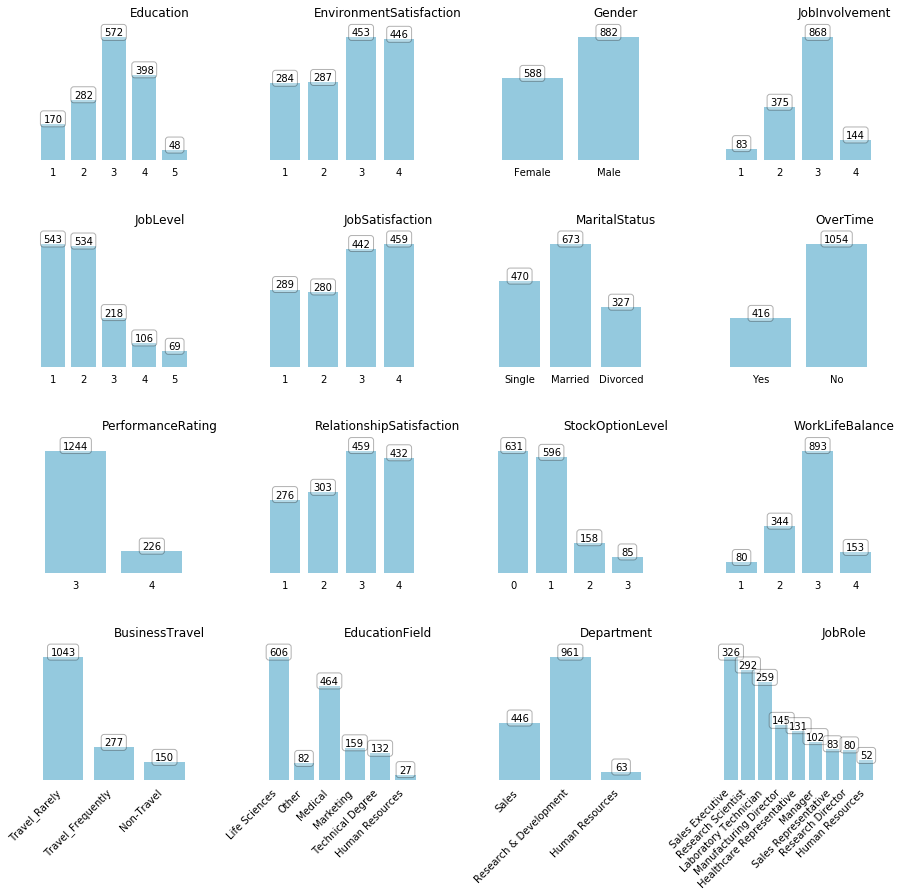

In [14]:
fig = plt.figure(figsize=(15,8))
for i, features in enumerate(categorical_features):
    ax = fig.add_subplot(4,4, i+1)
    # Remove all the ticks and directly label each bar with respective value
    ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
    ax.set_frame_on(False)
    ax.title.set_position([.8, 1.07])
    # Values annotation
    cnt= sns.countplot(data[features],color='skyblue')
    text_annotate(cnt)
    plt.title(features)
    plt.ylabel('')
    plt.xlabel('')
    if(i>11):
        plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=-0.4, top=0.9, wspace=0.5, hspace=0.6)
plt.show()

### Attrition

First of all, let us find out the number of employees who left the company and those who didn’t.
- There are approximately 16% leaving the company.

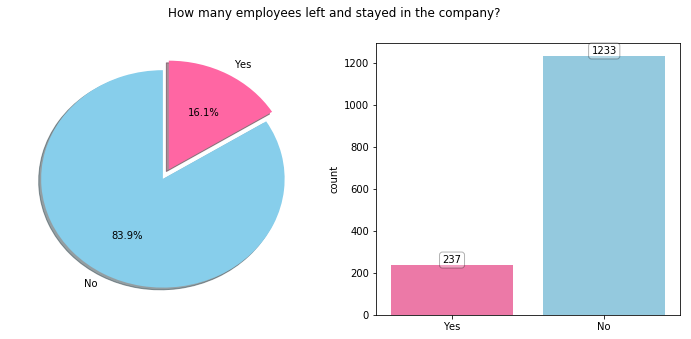

In [15]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
plt.suptitle('How many employees left and stayed in the company?',fontsize=12)

# Pie chart
data['Attrition'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=axes[0],
                                             colors=['skyblue','#ff66a3'], shadow=True, startangle=90)

axes[0].set_ylabel('')
# Bar chart
cnt = sns.countplot('Attrition', data=data, palette=['#ff66a3','skyblue'], ax=axes[1])
axes[1].set_xlabel('')

text_annotate(cnt)
plt.show()

### Age
We see that majority of employees leaving the company are around 30 years old.

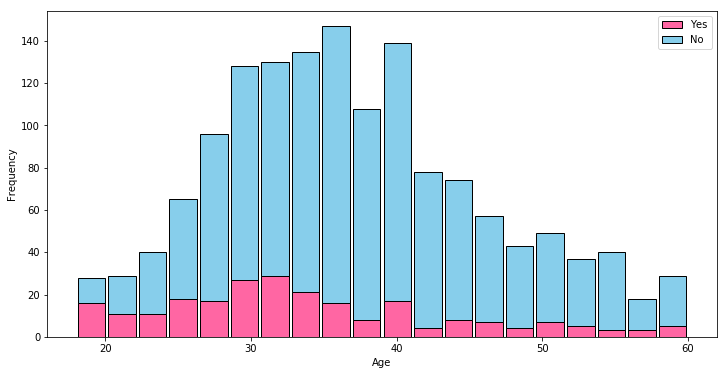

In [16]:
fig = plt.figure(figsize=(12,6))
plt.hist([data[data['Attrition']=='Yes']['Age'], data[data['Attrition']=='No']['Age']], stacked=True, 
         color = ['#ff66a3','skyblue'],label = ['Yes','No'],bins = 20,edgecolor='black',rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

#data[data['Attrition']=='Yes']['Age'].plot.hist(ax=axes[0],color='#ff66a3',bins=20,edgecolor='black')
#axes[0].set_title('Attrition= Yes')

#data[data['Attrition']=='No']['Age'].plot.hist(ax=axes[1],bins=20,edgecolor='black',color='skyblue')
#axes[1].set_title('Attrition= No')

It seems that a large majority of those who left had a lower monthly income. 

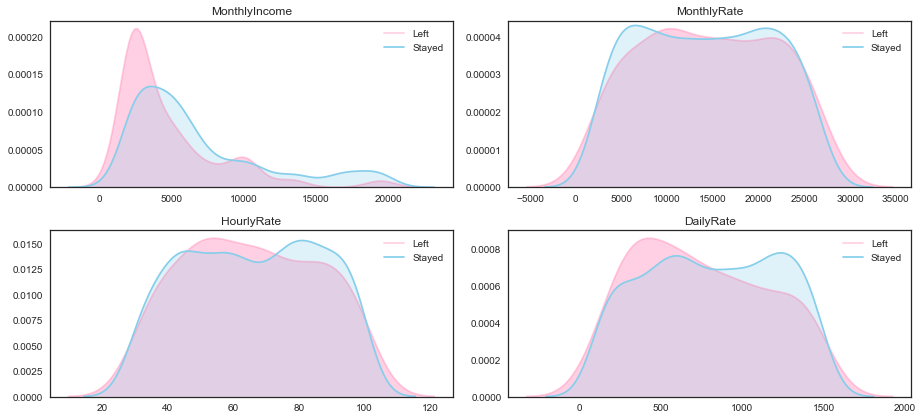

In [19]:
sns.set(style="white",palette=['#ff66a3','skyblue'])
salary = ['MonthlyIncome','MonthlyRate','HourlyRate','DailyRate']
fig = plt.figure(figsize=(13,6))
for i, features in enumerate(salary):
    ax = fig.add_subplot(2,2, i+1)
    sns.kdeplot(data[features][data['Attrition']=='Yes'],shade=True, alpha=0.3)
    sns.kdeplot(data[features][data['Attrition']=='No'],shade=True,)
    plt.title(features)
    plt.xlabel('')
    plt.legend(['Left','Stayed'])
plt.tight_layout()
plt.show()

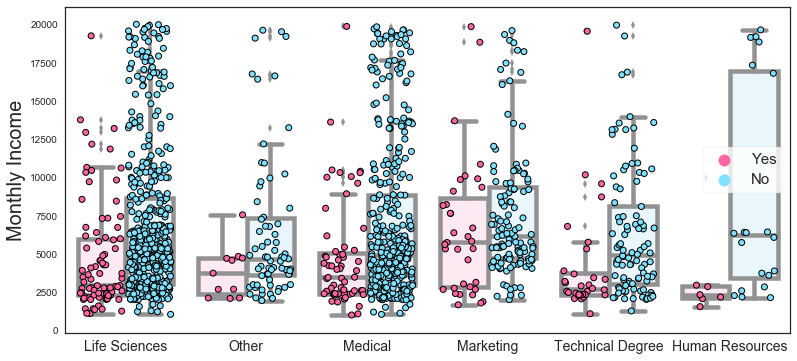

In [47]:
plt.figure(figsize=(13,6))
params = dict(data=data,
              x='EducationField',
              y='MonthlyIncome',
              hue='Attrition',
              dodge=True)

p = sns.stripplot(size=6,
                  jitter=0.35,
                  palette=['#ff66a3','#80e1ff'],
                  edgecolor='black',
                  linewidth=1,
                  **params)

p_box = sns.boxplot(palette=['#ffe6f0','#e6f9ff'],linewidth=4.5,**params)
handles,labels = p.get_legend_handles_labels()
plt.legend(handles[2:],
           labels[2:],
           #bbox_to_anchor = (.2,.95),
           fontsize = 15,
           markerscale = 1.5,
           frameon=True,
           labelspacing=0.4)
          
plt.xlabel('')
plt.ylabel('Monthly Income',fontsize=20)
#plt.gca().set_xlim(-0.5,3.5)
xlabels = p.get_xticklabels()
p.set_xticklabels(xlabels,fontsize=14)
plt.show()

In [21]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [22]:
employee = data.groupby(['YearsAtCompany','Attrition'])['YearsAtCompany'].count().unstack()
employee.reset_index(inplace=True)
employee.replace(np.nan, 0, inplace=True)

In [23]:
plot1 = go.Scatter(
    x = employee['YearsAtCompany'],
    y = employee['Yes'],
    mode = 'lines+markers',
    name = 'Left',
    line = dict(
        color = ('#ff66a3'),
        width = 3,)
   
   
)
plot2 = go.Scatter(
    x = employee['YearsAtCompany'],
    y = employee['No'],
    mode = 'lines+markers',
    name = 'Stayed',
    line = dict(
        color = ('#80e1ff'),
        width = 3,)
  
)

employee = [plot1, plot2]


# Edit the layout
layout = dict(title = '',
              xaxis = dict(title = 'Years in the Company'),
              yaxis = dict(title = 'Employees'),)
    

fig = dict(data=employee, layout=layout)
py.iplot(fig, filename='line-mode')


In [24]:
from bokeh.models import ColumnDataSource,CustomJS, CategoricalColorMapper
from bokeh.plotting import figure
from bokeh.layouts import row, column, widgetbox
from bokeh.io import output_notebook, show
from bokeh.models.widgets import Select
from bokeh.plotting import figure


output_notebook(hide_banner=True)

In [25]:
#data.drop(['Over18', 'EmployeeCount', 'EmployeeNumber' , 'StandardHours'], axis=1 ,inplace=True)

In [27]:
from bokeh.transform import jitter


color_mapper = CategoricalColorMapper(factors=['Yes', 'No'], 
                                      palette=['#ff66a3','skyblue'])

data['x']=np.nan
data['y']=np.nan
source = ColumnDataSource(data)

p = figure(plot_width=700, plot_height=300,toolbar_location=None)
p.circle(x=jitter('x',width=0.7), y=jitter('y',width=0.7,range=p.y_range),source=source, alpha=0.5,
          color={'field': 'Attrition', 'transform': color_mapper}, legend='Attrition',size=6)


callback = CustomJS(args={'source':source},code="""
        
        // create a new variable for the data of the column data source that is linked to the plot
        var data = source.data;

        // allocate the selected column to the field for the y values
        data['x'] = data[xaxis.value];
        data['y'] = data[yaxis.value];

        source.change.emit();
""")

col= ['TotalWorkingYears','Age','MonthlyIncome','MonthlyRate','YearsAtCompany',
      'YearsSinceLastPromotion','YearsInCurrentRole','JobSatisfaction']

select_x = Select(title="Features X:",options=col, callback=callback)
callback.args["xaxis"] = select_x

select_y = Select(title="Features Y:",options=col, callback=callback)
callback.args["yaxis"] = select_y

select_x.js_on_change('value', callback)
select_y.js_on_change('value', callback)

layout = row(p,widgetbox(select_x, select_y),)
show(layout)

In [30]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')